In [1]:
%cd ..

/Users/datvodinh/Documents/Github/data-science-project


#### Import

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import polars as pl
from sklearn.model_selection import train_test_split
from src.model.model import LaptopPredictionModel

#### Set plot style

In [3]:
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=12)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels
plt.rc('legend', fontsize=10)    # legend fontsize
plt.rc('font', size=10)

## Split Data

In [4]:
data = pd.read_csv('./data/process_data.csv')

In [5]:
features = data.drop(['Price (VND)'], axis=1)
labels = data['Price (VND)'] / 1000000
X_train, X_test, y_train, y_test = train_test_split(
    np.array(features), np.array(labels), test_size=0.1, random_state=42
    )
columns = features.columns

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((219, 41), (25, 41), (219,), (25,))

## Linear Regression

In [7]:
lnr_model = LaptopPredictionModel(model="lnr", columns=columns)

Training LinearRegression
shape: (1, 7)
┌─────────────────┬────────────┬───────────┬───────────┬──────────┬────────────────┬───────────────┐
│ Model           ┆ RMSE Train ┆ RMSE Test ┆ MAE Train ┆ MAE Test ┆ R2 Score Train ┆ R2 Score Test │
│ ---             ┆ ---        ┆ ---       ┆ ---       ┆ ---      ┆ ---            ┆ ---           │
│ str             ┆ f64        ┆ f64       ┆ f64       ┆ f64      ┆ f64            ┆ f64           │
╞═════════════════╪════════════╪═══════════╪═══════════╪══════════╪════════════════╪═══════════════╡
│ LinearRegressio ┆ 4.7911     ┆ 5.0228    ┆ 3.2122    ┆ 3.7412   ┆ 0.9169         ┆ 0.6479        │
│ n               ┆            ┆           ┆           ┆          ┆                ┆               │
└─────────────────┴────────────┴───────────┴───────────┴──────────┴────────────────┴───────────────┘


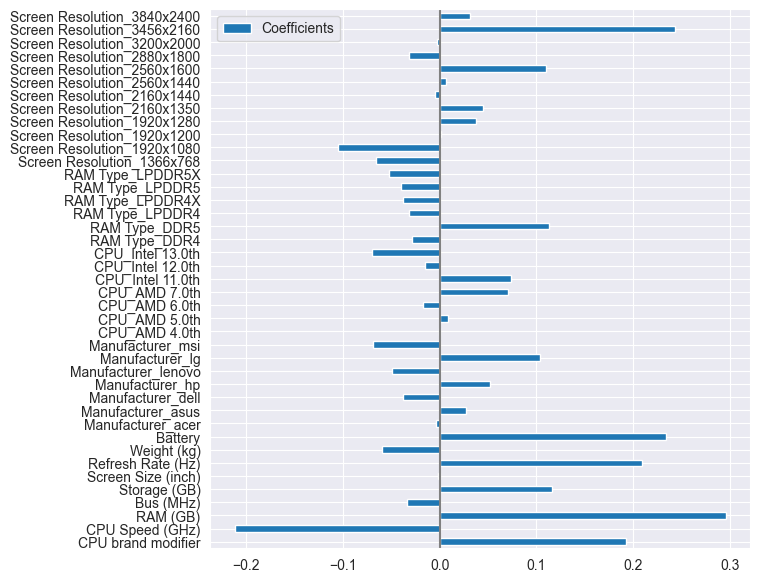

In [8]:
lnr_metrics = lnr_model.fit(X_train, X_test, y_train, y_test)

## Random Forest

In [9]:
rdf_params = {
    "n_estimators": [100,200,300,500],
    "criterion": ["squared_error","friedman_mse"],
    "max_depth": [None, 3, 5, 7, 9],
    "random_state": [42]
}

Training RandomForestRegressor
Fitting 5 folds for each of 40 candidates, totalling 200 fits


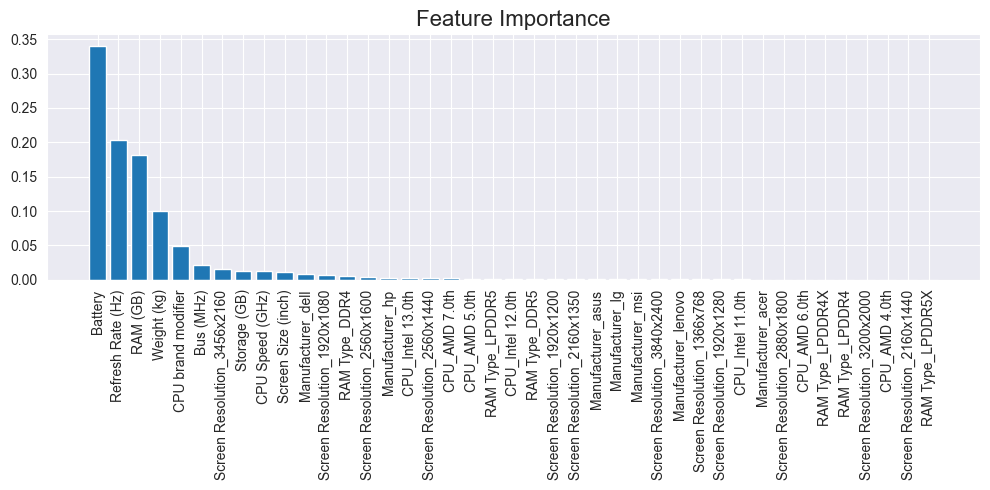

shape: (1, 7)
┌─────────────────┬────────────┬───────────┬───────────┬──────────┬────────────────┬───────────────┐
│ Model           ┆ RMSE Train ┆ RMSE Test ┆ MAE Train ┆ MAE Test ┆ R2 Score Train ┆ R2 Score Test │
│ ---             ┆ ---        ┆ ---       ┆ ---       ┆ ---      ┆ ---            ┆ ---           │
│ str             ┆ f64        ┆ f64       ┆ f64       ┆ f64      ┆ f64            ┆ f64           │
╞═════════════════╪════════════╪═══════════╪═══════════╪══════════╪════════════════╪═══════════════╡
│ RandomForestReg ┆ 2.2831     ┆ 3.5914    ┆ 1.2516    ┆ 2.1371   ┆ 0.9811         ┆ 0.82          │
│ ressor          ┆            ┆           ┆           ┆          ┆                ┆               │
└─────────────────┴────────────┴───────────┴───────────┴──────────┴────────────────┴───────────────┘


In [10]:
rdf_model = LaptopPredictionModel(
    model="rdf", params=rdf_params, columns=columns
)
rdf_metrics = rdf_model.fit(X_train, X_test, y_train, y_test)

## Gradient Boosting

In [11]:
gdb_params = {
    'loss': ['squared_error'],      
    'learning_rate': [0.1,0.01],    
    'n_estimators': [100,200,300,500],  
    'criterion' : ['friedman_mse'], 
    'max_depth': [3,5,7,9],         
    'validation_fraction': [0.1]
}

Training GradientBoostingRegressor
Fitting 5 folds for each of 32 candidates, totalling 160 fits


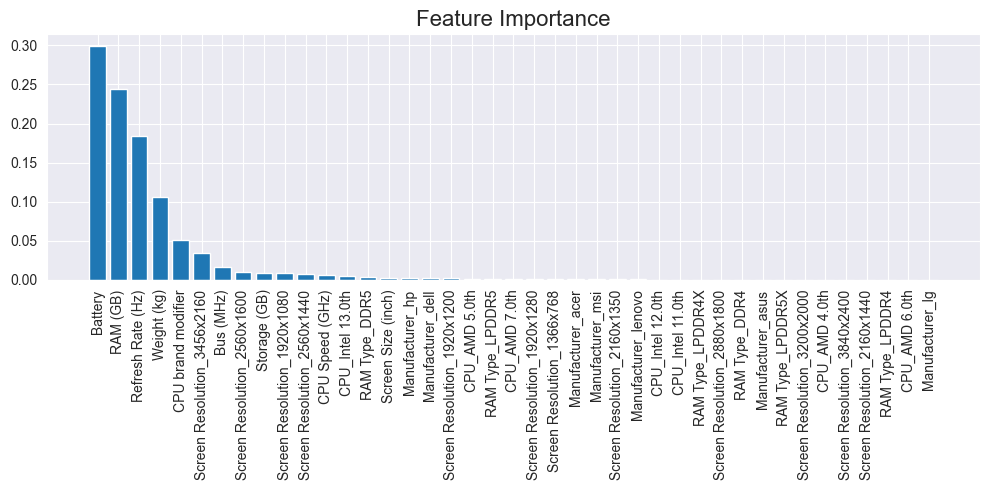

shape: (1, 7)
┌─────────────────┬────────────┬───────────┬───────────┬──────────┬────────────────┬───────────────┐
│ Model           ┆ RMSE Train ┆ RMSE Test ┆ MAE Train ┆ MAE Test ┆ R2 Score Train ┆ R2 Score Test │
│ ---             ┆ ---        ┆ ---       ┆ ---       ┆ ---      ┆ ---            ┆ ---           │
│ str             ┆ f64        ┆ f64       ┆ f64       ┆ f64      ┆ f64            ┆ f64           │
╞═════════════════╪════════════╪═══════════╪═══════════╪══════════╪════════════════╪═══════════════╡
│ GradientBoostin ┆ 1.4972     ┆ 3.7745    ┆ 1.2       ┆ 2.4442   ┆ 0.9919         ┆ 0.8011        │
│ gRegressor      ┆            ┆           ┆           ┆          ┆                ┆               │
└─────────────────┴────────────┴───────────┴───────────┴──────────┴────────────────┴───────────────┘


In [12]:
gdb_model = LaptopPredictionModel(
    model="gdb", params=gdb_params, columns=columns
)
gdb_metrics = gdb_model.fit(X_train, X_test, y_train, y_test)

## XGBoost

In [13]:
xgb_params = {
    'learning_rate': [0.01, 0.1],  
    'max_depth': [3, 5, 7],        
    'min_child_weight': [1, 3, 5], 
    'subsample': [0.5, 0.7],      
    'colsample_bytree': [0.5, 0.7], 
    'n_estimators' : [100, 200, 300,500], 
    'objective': ['reg:squarederror']
}

Training XGBRegressor
Fitting 5 folds for each of 288 candidates, totalling 1440 fits


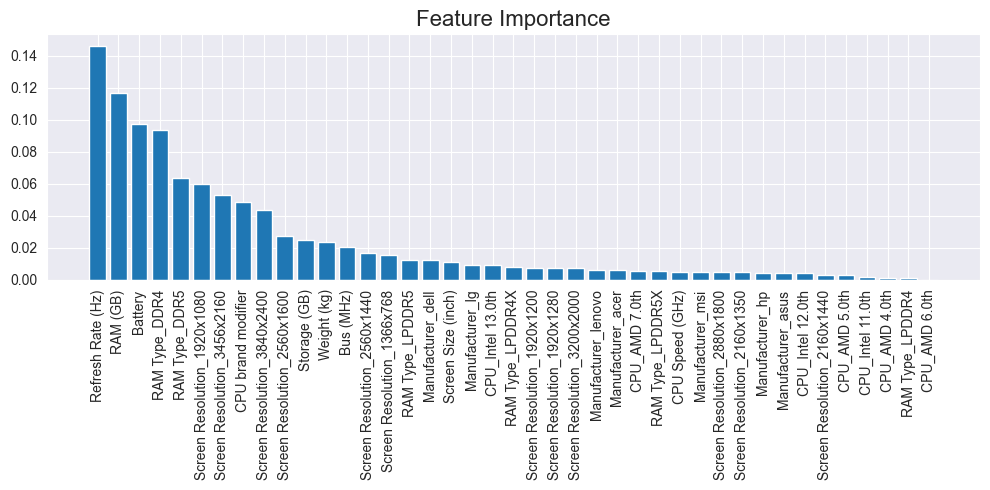

shape: (1, 7)
┌──────────────┬────────────┬───────────┬───────────┬──────────┬────────────────┬───────────────┐
│ Model        ┆ RMSE Train ┆ RMSE Test ┆ MAE Train ┆ MAE Test ┆ R2 Score Train ┆ R2 Score Test │
│ ---          ┆ ---        ┆ ---       ┆ ---       ┆ ---      ┆ ---            ┆ ---           │
│ str          ┆ f64        ┆ f64       ┆ f64       ┆ f64      ┆ f64            ┆ f64           │
╞══════════════╪════════════╪═══════════╪═══════════╪══════════╪════════════════╪═══════════════╡
│ XGBRegressor ┆ 0.5143     ┆ 3.2141    ┆ 0.1423    ┆ 2.2067   ┆ 0.999          ┆ 0.8558        │
└──────────────┴────────────┴───────────┴───────────┴──────────┴────────────────┴───────────────┘


In [14]:
xgb_model = LaptopPredictionModel(
    model="xgb", params=xgb_params, columns=columns
)
xbg_metrics = xgb_model.fit(X_train, X_test, y_train, y_test)

## Overview

In [17]:
all_metrics = pl.concat([lnr_metrics, rdf_metrics, gdb_metrics, xbg_metrics])

In [19]:
print(all_metrics)

shape: (4, 7)
┌─────────────────┬────────────┬───────────┬───────────┬──────────┬────────────────┬───────────────┐
│ Model           ┆ RMSE Train ┆ RMSE Test ┆ MAE Train ┆ MAE Test ┆ R2 Score Train ┆ R2 Score Test │
│ ---             ┆ ---        ┆ ---       ┆ ---       ┆ ---      ┆ ---            ┆ ---           │
│ str             ┆ f64        ┆ f64       ┆ f64       ┆ f64      ┆ f64            ┆ f64           │
╞═════════════════╪════════════╪═══════════╪═══════════╪══════════╪════════════════╪═══════════════╡
│ LinearRegressio ┆ 4.7911     ┆ 5.0228    ┆ 3.2122    ┆ 3.7412   ┆ 0.9169         ┆ 0.6479        │
│ n               ┆            ┆           ┆           ┆          ┆                ┆               │
│ RandomForestReg ┆ 2.2831     ┆ 3.5914    ┆ 1.2516    ┆ 2.1371   ┆ 0.9811         ┆ 0.82          │
│ ressor          ┆            ┆           ┆           ┆          ┆                ┆               │
│ GradientBoostin ┆ 1.4972     ┆ 3.7745    ┆ 1.2       ┆ 2.4442   ┆ 0.9919   